- *Decision Tree will be slow in creating predictions. May cause Overfitting problems.*

### Random Forest
- Random Forest is one of the Ensemble Technique and it contains almost same parameters of Decision Tree.
    - Ensemble model create group of models and combine them to produce improved result.
- Collection of Decision trees are called a Random Forest
- The random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
- It plays key role for huge amount of dataset.

#### Why use Random Forest?
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- It can also maintain accuracy when a large proportion of data is missing.

#### How does Random Forest works
- Step1: Selection of Random subsets are created from the dataset (bootstrapping).
- Step2: Decision Tree model is applied for each Subset.
- Step3: The final prediction is calculated by averaging the predictions from all decision trees.

#### Advantages of Random Forest
- Random Forest is capable of performing both Classification and Regression tasks.
- It is capable of handling large datasets with high dimensionality.
- It enhances the accuracy of the model and prevents the overfitting issue.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
df = pd.DataFrame(digits.data,
                  columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


MNIST dataset

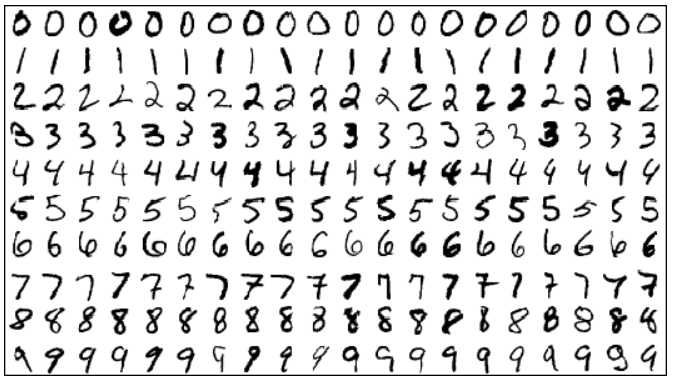

In [7]:
df.shape

(1797, 64)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
df['digits'] = digits.target

In [10]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digits
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [11]:
df['digits'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: digits, dtype: int64

In [12]:
len(df['digits'].value_counts())

10

In [14]:
df.isnull().sum().sum()

0

In [15]:
X = df.drop(['digits'],axis=1)
Y = df['digits']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.3,
                                               random_state=1)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc1 = RandomForestClassifier(n_estimators=200,
                               max_depth = 2)

In [53]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=200)

In [54]:
y_predict = rfc1.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
confusion_matrix(Y_test,y_predict)

array([[57,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 39,  4,  0,  0,  2,  3,  0,  0,  1],
       [ 0,  0, 47,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1, 52,  0,  4,  0,  2,  1,  2],
       [ 1,  1,  0,  0, 57,  0,  1,  1,  0,  0],
       [ 1,  1,  0,  0,  0, 44,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 56,  0,  0],
       [ 0,  2,  5,  2,  0,  2,  0,  2, 32,  1],
       [ 0,  0,  0,  2,  0,  2,  0,  4,  0, 49]], dtype=int64)

In [25]:
accuracy_score(Y_test,y_predict)

0.8962962962962963

In [37]:
rfc1.estimators_[0]

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=815188744)

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

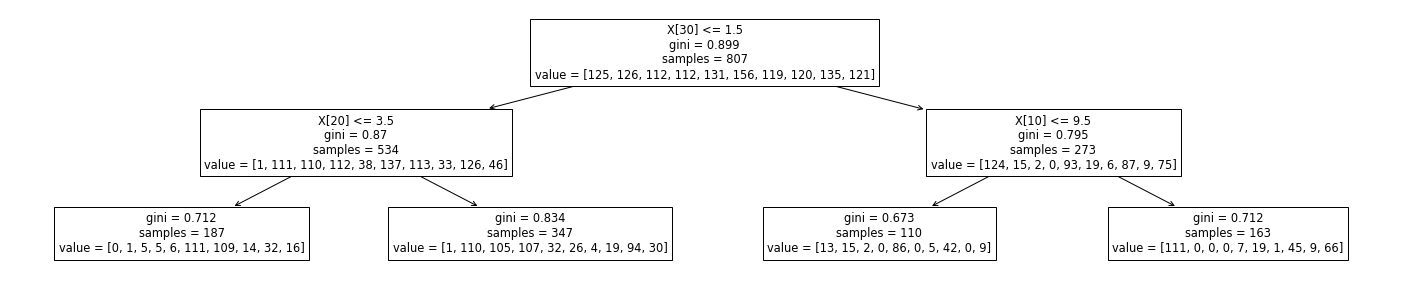

In [55]:
plt.figure(figsize=(25,5))
tree.plot_tree(rfc1.estimators_[0])
plt.show()

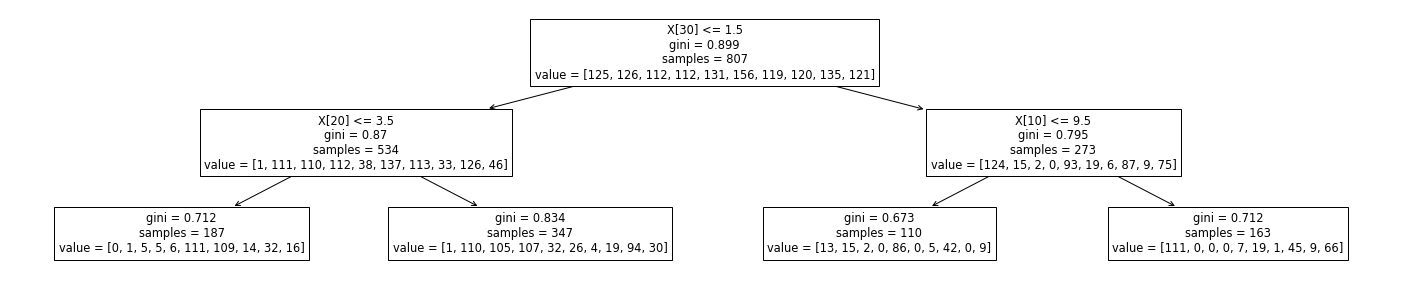

In [57]:
# to save the figure in local drive, dont use plt.show()

plt.figure(figsize=(25,5))
tree.plot_tree(rfc1.estimators_[0])
plt.savefig('tree.jpg')

In [56]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then th